In [1]:
from importlib import reload
import re
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = 'Arial'

from byc import constants, utilities, files, flow
for mod in [constants, utilities, files, flow]:
    reload(mod)

C:\.byc\lib\site-packages\FlowCytometryTools\core\docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [2]:
expts = flow.Experiments()
alldf = expts.exptdf('20200902')

alldf.loc[:, 'yfp_rfp'] = alldf['Alexa Fluor 488-A']/alldf['DsRed-A']
alldf.loc[:, 'rfp_yfp'] = alldf['DsRed-A']/alldf['Alexa Fluor 488-A']

### Scatter

In [11]:
# Plotting settings
kwargs = {'yscale': 'log',
          'xscale': 'log'}

alpha = 0.1

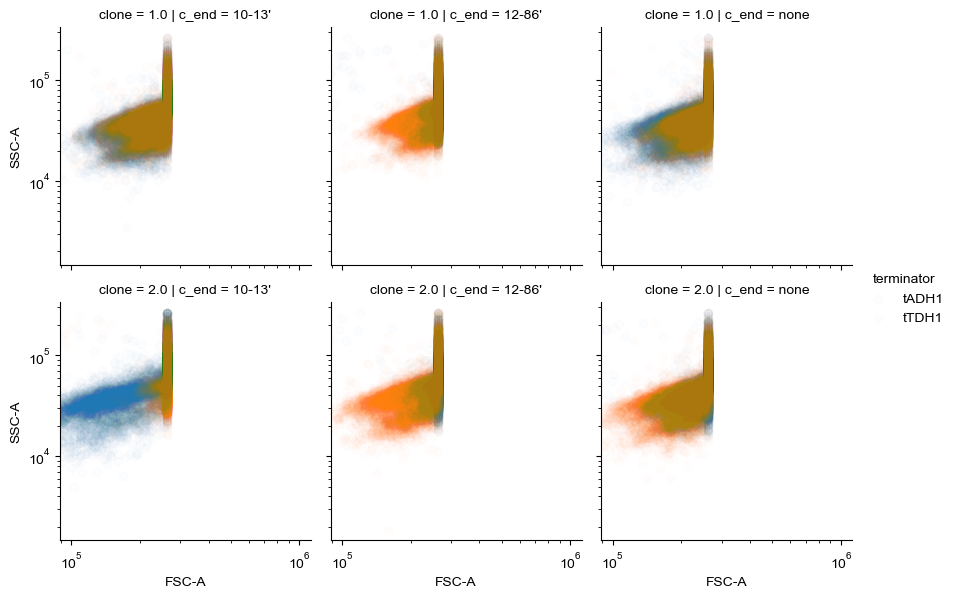

In [12]:
fluor = 'SYFP2'
save = False

x = 'FSC-A'
y = 'SSC-A'

refined = alldf.loc[alldf.fluorophore==fluor]
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

g = sns.FacetGrid(refined, row='clone', col='c_end', hue='terminator',
                  height=3,
                  col_order=["10-13'", "12-86'", "none"],
                  hue_order=['tADH1', 'tTDH1'])

g = g.map(plt.scatter, x, y, alpha=0.01).add_legend()

g.set(**kwargs)

if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_all_scatter.png'))

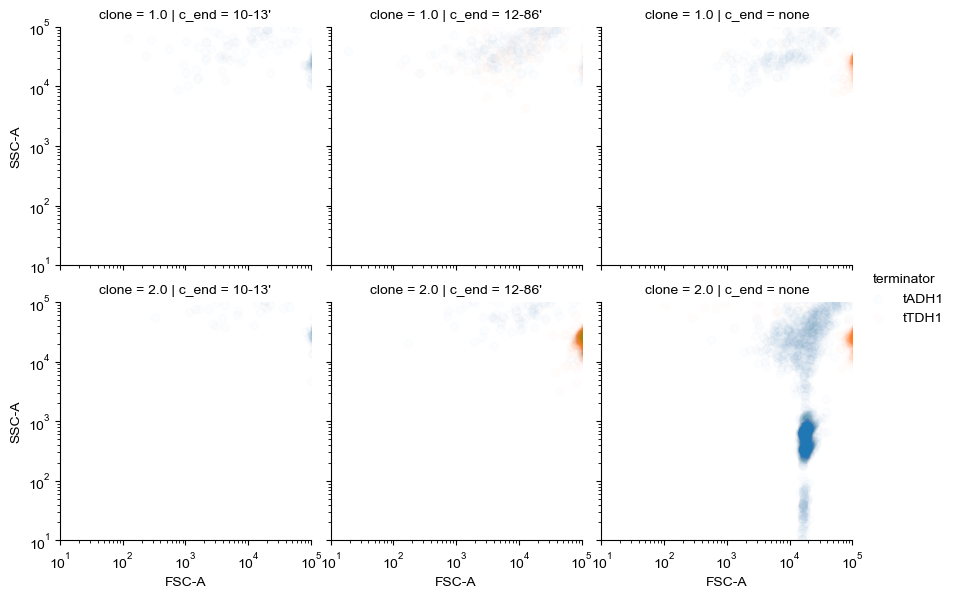

In [9]:
fluor = 'mScarletI'
save = False

x = 'FSC-A'
y = 'SSC-A'

refined = alldf.loc[alldf.fluorophore==fluor]
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

g = sns.FacetGrid(refined, row='clone', col='c_end', hue='terminator',
                  height=3,
                  col_order=["10-13'", "12-86'", "none"],
                  hue_order=['tADH1', 'tTDH1'])

g = g.map(plt.scatter, x, y, alpha=0.01).add_legend()

g.set(**kwargs)

if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_all_scatter.png'))

### Fluorescence

In [106]:
# Plotting settings
kwargs = {'xlim': (10, 100000),
          'ylim': (10, 100000),
          'yscale': 'log',
          'xscale': 'log'}

alpha = 0.05
markersize=0.2

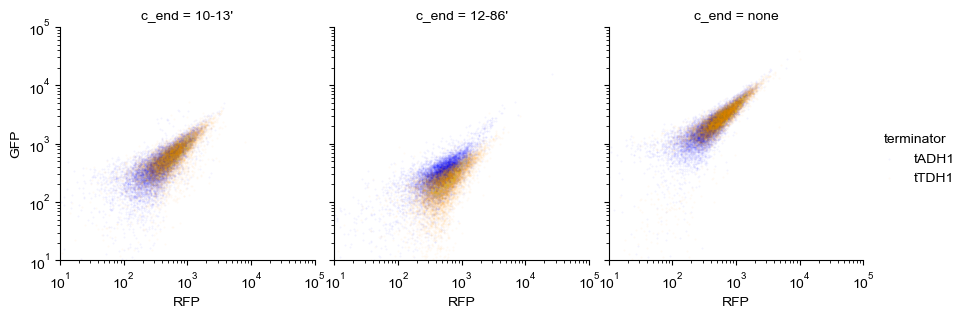

In [110]:
fluor = 'SYFP2'
save = True

refined = alldf.loc[alldf.fluorophore==fluor]
refined = refined.loc[refined.clone==1.0].sample(48000)
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

g = sns.FacetGrid(refined, col='c_end', hue='terminator',
                  height=3.2,
                  aspect=0.94,
                  col_order=["10-13'", "12-86'", "none"],
                  hue_order=['tADH1', 'tTDH1'],
                  palette=['blue', 'orange'])

g = g.map(plt.scatter, 'DsRed-A', 'Alexa Fluor 488-A',
          alpha=alpha,
          s=markersize)

g.add_legend()
g.set(**kwargs)
g.set_axis_labels("RFP", "GFP")
if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_80percent_single_clone.png'))

In [109]:
refined.columns

Index(['FSC-A', 'SSC-A', 'Alexa Fluor 405-A', 'Alexa Fluor 430-A',
       'Qdot 605-A', 'APC-A', 'Alexa Fluor 700-A', 'APC-Cy7-A',
       'Alexa Fluor 488-A', 'PerCP-Cy5-5-A', 'PE-A', 'DsRed-A', '7-AAD-A',
       'PE-Cy5-5-A', 'PE-Cy7-A', 'Time', 'strain', 'filepath', 'clone', 'name',
       'plasmid', 'control', 'n_end', 'fluorophore', 'c_end', 'terminator',
       'yfp_rfp', 'rfp_yfp'],
      dtype='object')

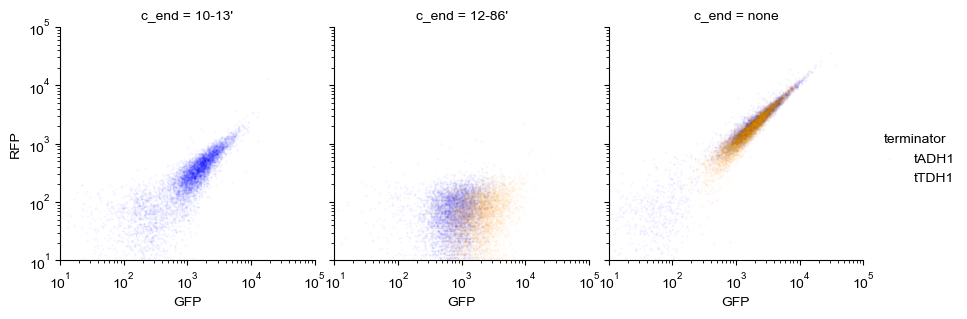

In [112]:
fluor = 'mScarletI'
save = True

refined = alldf.loc[alldf.fluorophore==fluor]
refined = refined.loc[refined.clone==2.0].sample(40000)
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

g = sns.FacetGrid(refined, col='c_end', hue='terminator',
                  height=3.2,
                  aspect=0.94,
                  col_order=["10-13'", "12-86'", "none"],
                  hue_order=['tADH1', 'tTDH1'],
                  palette=['blue', 'orange'])

g = g.map(plt.scatter, 'Alexa Fluor 488-A', 'DsRed-A',
          alpha=alpha,
          s=markersize)

g.add_legend()
g.set(**kwargs)
g.set_axis_labels('GFP', 'RFP')

if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_80percent_single_clone.png'))

In [7]:
fluor = 'mScarletI'
save = False

refined = alldf.loc[alldf.fluorophore==fluor]
refined = refined.loc[refined.terminator=='tADH1']
savedir = os.path.dirname(os.path.dirname(refined.filepath.iloc[0]))

ax = sns.boxplot(data=refined, x='c_end', y='rfp_yfp', hue='clone',
                 order=["10-13'", "12-86'", "none"])

# ax.set_yscale('log')
ax.set_ylim(-5, 5)

if save:
    g.savefig(dpi=300, fname=os.path.join(savedir, f'{fluor}_all.png'))

### 20201104

In [22]:
from importlib import reload
import re
import os

import numpy as np
import pandas as pd

from FlowCytometryTools import FCMeasurement

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

plt.style.use('default')
matplotlib.rcParams['font.sans-serif'] = 'Arial'

from byc import constants, utilities, files, flow
for mod in [constants, utilities, files, flow]:
    reload(mod)


In [4]:
expts = flow.Experiments()
masterdf = expts.all_master_idx_dfs[2]
alldf = expts.exptdf('20201104', master_index_df=masterdf)

Found master index with 30 samples at
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_002.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_003.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_004.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_005.fcs
Found data
Found 10000 measurements in this file
Looking for data at C:\Users\John Cooper\Box Sync\Finkelstein-Matouschek\flow_cytometry\20201104_TDH3_new_substrates\data\11042020-bls_Tube_006.fcs
Found data
Found 10000 mea

In [6]:
alldf.columns

Index(['FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W',
       'Alexa Fluor 405-A', 'Alexa Fluor 430-A', 'Qdot 605-A', 'APC-A',
       'Alexa Fluor 700-A', 'APC-Cy7-A', 'Alexa Fluor 488-A', 'PerCP-Cy5-5-A',
       'PE-A', 'DsRed-A', '7-AAD-A', 'PE-Cy5-5-A', 'PE-Cy7-A', 'Time',
       'Unnamed: 0', 'Sample:', 'YFP', 'dsRed/YFP', 'dsRed', 'clone', 'strain',
       'N.End', 'substrate', 'Protein', 'Tail', 'Strain', 'Reference',
       'Expression', 'Location', 'expt_dir', 'filepath'],
      dtype='object')

In [10]:
table = pd.pivot_table(alldf, index=['substrate', 'clone'], aggfunc='mean').reset_index()

In [ ]:
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='WT',
                          markerfacecolor='w', markersize=6),
                  Line2D([0], [0], marker='o', color='black', label='$\it{rpn4}$\u0394',
                          markerfacecolor='w', markersize=6),
                  Patch(facecolor='orange', edgecolor='r',
                         label='Color Patch')]]
ax.legend(handles=legend_elements, frameon=False, fontsize=12)

In [34]:
datadf.index.unique()

Index(['NLS-mScarletI', 'NLS-mScarletI-Bgl2', 'NLS-mScarletI-VHL',
       'RKK-mScarletI-NS', 'UBL-mScarletI-NS', 'mScarletI', 'mScarletI-10-13',
       'mScarletI-12-86-deg', 'mScarletI-CytoDeg', 'mScarletI-ERmDeg'],
      dtype='object', name='substrate')

In [39]:
len(order)

11

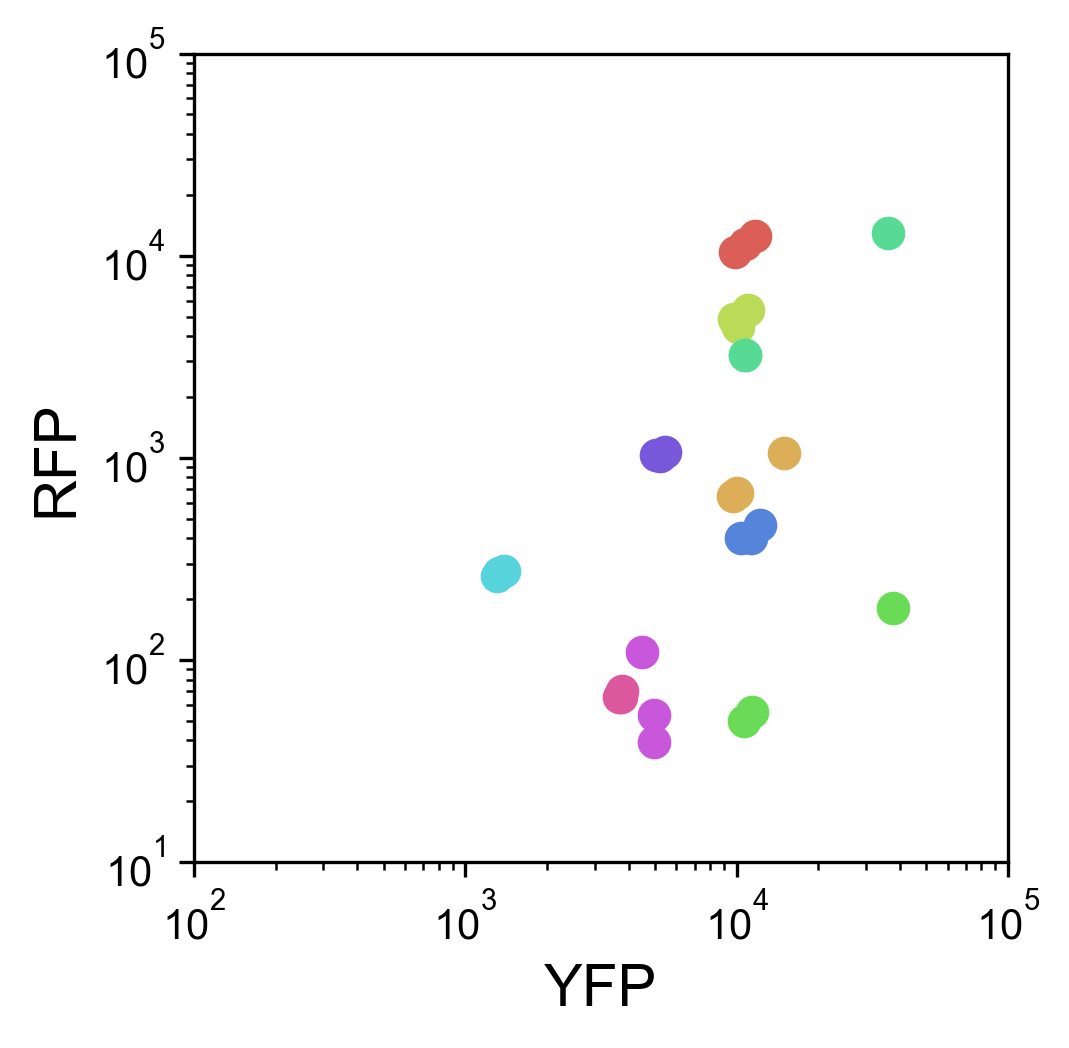

In [52]:
datadf = table.set_index('substrate')
order = ['mScarletI',
         'UBL-mScarletI-NS',
         'RKK-mScarletI-NS',
         'mScarletI-CytoDeg',
         'mScarletI-10-13',
         'mScarletI-ERmDeg',
         'mScarletI-12-86-deg',
         'NLS-mScarletI',
         'NLS-mScarletI-Bgl2',
         'NLS-mScarletI-VHL']

fig = plt.figure(figsize=(3.5, 3.5), dpi=300)
ax = plt.axes()
fontsize=14
colors = sns.color_palette("hls", len(order))

i = 0
legend_elements = []
for idx in order:
    df = datadf.loc[idx, :]
    ax.scatter(df['Alexa Fluor 488-A'], df['DsRed-A'],
               s=50, color=colors[i],
               alpha=1)
    # Set legend elements
    ele = Line2D([0], [0], marker='o', color='w', label=str(idx),
                          markerfacecolor=colors[i], markersize=15)
    legend_elements.append(ele)
    # Advance ticker
    i += 1

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(10, 100000)
ax.set_xlim(100, 100000)

ax.set_ylabel('RFP', fontsize=fontsize)
ax.set_xlabel('YFP', fontsize=fontsize)

#ax.legend(handles=legend_elements, frameon=False, fontsize=12)

fig.savefig('All_TDH3_integrants_flow_scatter.svg')